In [1]:
import model as m
import matplotlib.pyplot as plt
# Visualizations will be shown in the notebook.
%matplotlib inline

Using TensorFlow backend.


In [2]:
def plot_model(model, to_file):
    from keras.utils import plot_model
    from IPython.display import Image
    plot_model(model, show_shapes=True, show_layer_names=False, rankdir='TB', to_file=to_file)
    return Image(filename=to_file)

/home/frankknoll/udacity/SDCND/CarND-Behavioral-Cloning-P3/model.py:44: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(24, (5, 5), strides=(2, 2), activation="relu")`
  model.add(Convolution2D(24, 5, 5, subsample=(2, 2), activation='relu'))
/home/frankknoll/udacity/SDCND/CarND-Behavioral-Cloning-P3/model.py:45: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu")`
  model.add(Convolution2D(64, 3, 3, activation='relu'))
/home/frankknoll/udacity/SDCND/CarND-Behavioral-Cloning-P3/model.py:46: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu")`
  model.add(Convolution2D(64, 3, 3, activation='relu'))


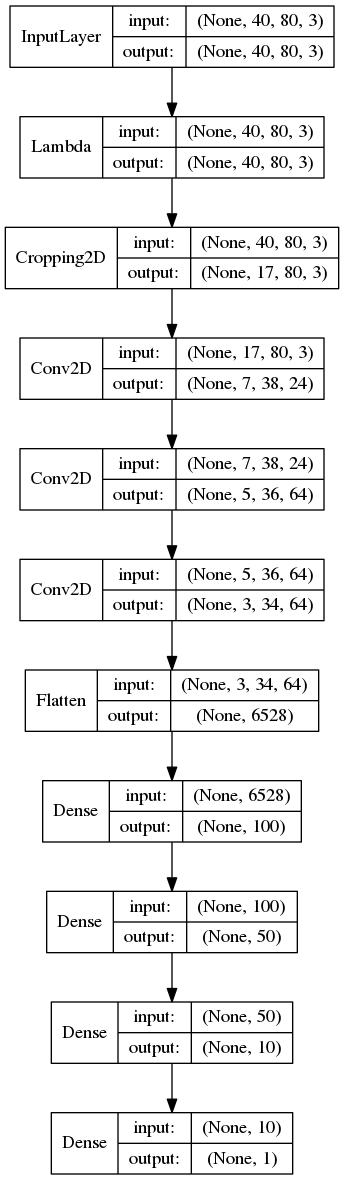

In [3]:
model = m.create_model_Nvidia()
plot_model(model, "examples/model_nvidia.jpg")

/home/frankknoll/anaconda3/envs/carnd-term1/lib/python3.5/site-packages/ipykernel_launcher.py:6: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0.
Use ``matplotlib.pyplot.imread`` instead.
  


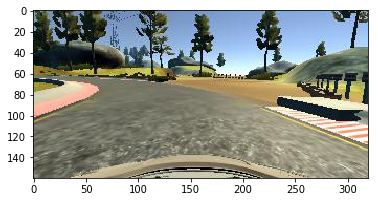

/home/frankknoll/anaconda3/envs/carnd-term1/lib/python3.5/site-packages/ipykernel_launcher.py:11: DeprecationWarning: `imsave` is deprecated!
`imsave` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imwrite`` instead.
  # This is added back by InteractiveShellApp.init_path()


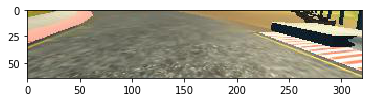

/home/frankknoll/anaconda3/envs/carnd-term1/lib/python3.5/site-packages/ipykernel_launcher.py:16: DeprecationWarning: `imsave` is deprecated!
`imsave` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imwrite`` instead.
  app.launch_new_instance()


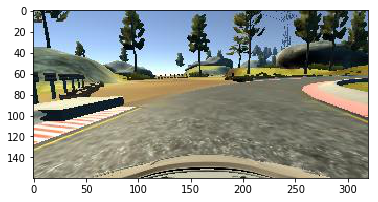

/home/frankknoll/anaconda3/envs/carnd-term1/lib/python3.5/site-packages/ipykernel_launcher.py:22: DeprecationWarning: `imsave` is deprecated!
`imsave` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imwrite`` instead.


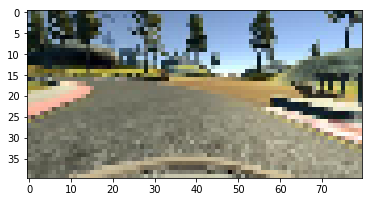

In [4]:
import numpy as np
from scipy import ndimage
from scipy.misc import imsave
from preprocess import preprocess

image = ndimage.imread('../CarND-Behavioral-Cloning-P3-data_from_udacity/data/IMG/center_2016_12_01_13_31_15_308.jpg')
plt.imshow(image)
plt.show()

cropped_image = image[70:, :][:-25, :]
imsave('examples/center_2016_12_01_13_31_15_308_cropped.jpg', cropped_image)
plt.imshow(cropped_image)
plt.show()

image_flipped = np.fliplr(image)
imsave('examples/center_2016_12_01_13_31_15_308_flipped.jpg', image_flipped)
plt.imshow(image_flipped)
plt.show()

preprocessed_image = preprocess(image)
plt.imshow(preprocessed_image)
imsave('examples/center_2016_12_01_13_31_15_308_quartered.jpg', preprocessed_image)
plt.show()

In [5]:
def plot_loss(history_object, savefile):
    plt.plot(history_object.history['loss'])
    plt.plot(history_object.history['val_loss'])
    plt.title('model mean squared error loss')
    plt.ylabel('mean squared error loss')
    plt.xlabel('epoch')
    plt.legend(['training set', 'validation set'], loc='upper right')
    plt.savefig(savefile)
    plt.show()

In [6]:
X_train, y_train = m.get_X_train_y_train()

In [7]:
def train_and_plot(model, X, y, save_model_2_file, save_fig_2_file):
    history_object = m.train(model, X, y, save_model_2_file)
    plot_loss(history_object, save_fig_2_file)
    print("minimal validation loss: {:.5f}".format(min(history_object.history['val_loss'])))

Train on 38572 samples, validate on 9644 samples
Epoch 1/5
38572/38572 [==============================] - 2s 47us/step - loss: 4947.6033 - val_loss: 850.1630
Epoch 2/5
38572/38572 [==============================] - 2s 50us/step - loss: 1508.5015 - val_loss: 1002.6738
Epoch 3/5
38572/38572 [==============================] - 2s 45us/step - loss: 1623.7759 - val_loss: 309.4924
Epoch 4/5
38572/38572 [==============================] - 2s 50us/step - loss: 1560.4815 - val_loss: 751.9008
Epoch 5/5
38572/38572 [==============================] - 2s 47us/step - loss: 1366.3895 - val_loss: 643.5713


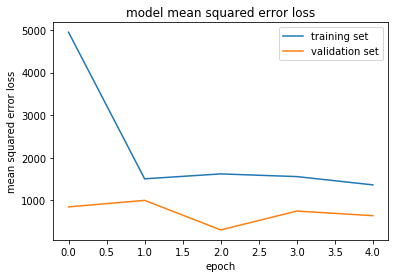

minimal validation loss: 309.49244


In [8]:
train_and_plot(m.create_model_simple(), X_train, y_train, save_model_2_file='model_simple.h5', save_fig_2_file='examples/loss_model_simple.png')

/home/frankknoll/udacity/SDCND/CarND-Behavioral-Cloning-P3/model.py:29: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(6, (5, 5), activation="relu")`
  model.add(Convolution2D(6, 5, 5, activation='relu'))
/home/frankknoll/udacity/SDCND/CarND-Behavioral-Cloning-P3/model.py:31: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(6, (5, 5), activation="relu")`
  model.add(Convolution2D(6, 5, 5, activation='relu'))


Train on 38572 samples, validate on 9644 samples
Epoch 1/5
38572/38572 [==============================] - 25s 648us/step - loss: 0.0186 - val_loss: 0.0286
Epoch 2/5
38572/38572 [==============================] - 31s 806us/step - loss: 0.0160 - val_loss: 0.0260
Epoch 3/5
38572/38572 [==============================] - 31s 794us/step - loss: 0.0154 - val_loss: 0.0319
Epoch 4/5
38572/38572 [==============================] - 29s 747us/step - loss: 0.0150 - val_loss: 0.0315
Epoch 5/5
38572/38572 [==============================] - 24s 631us/step - loss: 0.0147 - val_loss: 0.0312


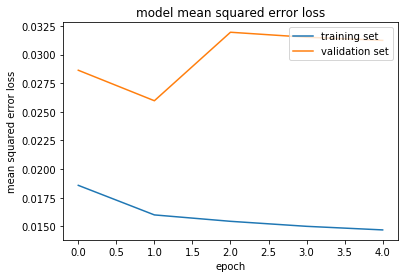

minimal validation loss: 0.02597


In [9]:
train_and_plot(m.create_model_LeNet(), X_train, y_train, 'model_lenet.h5', save_fig_2_file='examples/loss_model_lenet.png')

/home/frankknoll/udacity/SDCND/CarND-Behavioral-Cloning-P3/model.py:44: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(24, (5, 5), strides=(2, 2), activation="relu")`
  model.add(Convolution2D(24, 5, 5, subsample=(2, 2), activation='relu'))
/home/frankknoll/udacity/SDCND/CarND-Behavioral-Cloning-P3/model.py:45: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu")`
  model.add(Convolution2D(64, 3, 3, activation='relu'))
/home/frankknoll/udacity/SDCND/CarND-Behavioral-Cloning-P3/model.py:46: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu")`
  model.add(Convolution2D(64, 3, 3, activation='relu'))


Train on 38572 samples, validate on 9644 samples
Epoch 1/5
38572/38572 [==============================] - 47s 1ms/step - loss: 0.0189 - val_loss: 0.0261
Epoch 2/5
38572/38572 [==============================] - 47s 1ms/step - loss: 0.0147 - val_loss: 0.0317
Epoch 3/5
38572/38572 [==============================] - 48s 1ms/step - loss: 0.0138 - val_loss: 0.0332
Epoch 4/5
38572/38572 [==============================] - 50s 1ms/step - loss: 0.0130 - val_loss: 0.0313
Epoch 5/5
38572/38572 [==============================] - 49s 1ms/step - loss: 0.0125 - val_loss: 0.0238


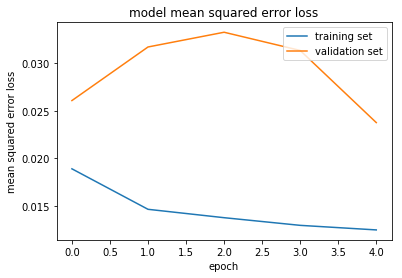

minimal validation loss: 0.02376


In [10]:
train_and_plot(m.create_model_Nvidia(), X_train, y_train, 'model_nvidia.h5', save_fig_2_file='examples/loss_model_nvidia.png')